In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("A://Zomato Data.csv")
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [3]:
df.size

1036

In [4]:
df.shape

(148, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


# Converting data type of "rate"

In [6]:
def HandleRate(number):
    number = str(number).split('/')
    number = number[0]
    return float(number)
df['rate'] = df['rate'].apply(HandleRate)
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


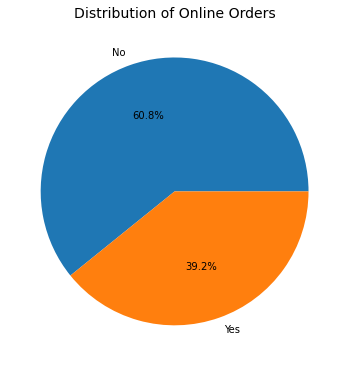

In [14]:
order_distribution = df['online_order'].value_counts()
plt.figure(figsize=(6,8))
plt.pie(order_distribution , labels = order_distribution.index, autopct = "%1.1f%%")

plt.title("Distribution of Online Orders", fontsize = 14)
plt.show()

# Type of Restaurant

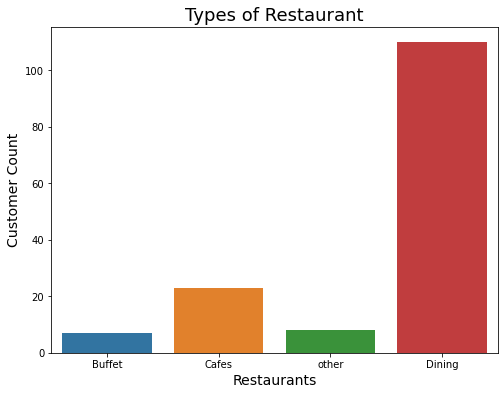

In [35]:
plt.figure(figsize=(8,6))
sns.countplot(x = df['listed_in(type)'])
plt.xlabel("Restaurants",fontsize =14)
plt.ylabel("Customer Count",fontsize = 14)
plt.title("Types of Restaurant",fontsize = 18)
plt.show()

Majority of the customers order from Dining 

# Vote Distribution based on restaurant 

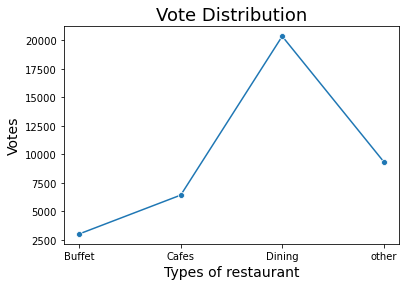

In [33]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum().reset_index()
sns.lineplot(data = grouped_data , x = "listed_in(type)" , y = "votes" , marker = "o")
plt.xlabel("Types of restaurant", fontsize=14)
plt.ylabel("Votes", fontsize=14)
plt.title("Vote Distribution", fontsize=18)
plt.show()

Dining restaurant has received max votes

In [36]:
df['rate'].value_counts()

3.8    20
3.7    15
3.3    14
3.4    12
4.1    11
3.6    11
4.0    10
3.9    10
4.2     8
3.1     7
3.2     7
2.9     7
3.5     6
4.6     2
2.8     2
4.4     2
3.0     2
4.3     1
2.6     1
Name: rate, dtype: int64

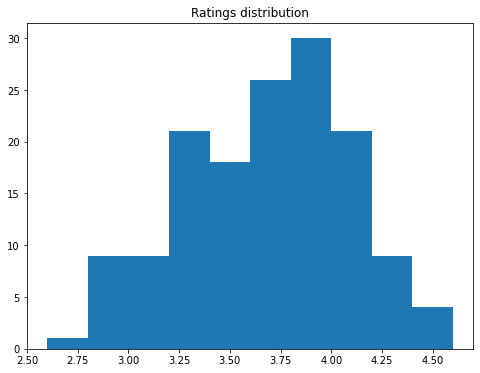

In [54]:
plt.figure(figsize = (8,6))
plt.hist(df['rate'],bins = 10)
plt.title("Ratings distribution")
plt.show()

# Max Rating based on Order Mode

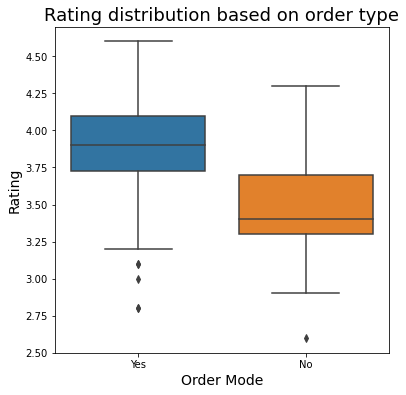

In [62]:
plt.figure(figsize = (6,6))
sns.boxplot(data = df, x= "online_order", y = "rate")

plt.xlabel("Order Mode",fontsize = 14)
plt.ylabel("Rating", fontsize = 14)
plt.title("Rating distribution based on order type",fontsize = 18)
plt.show()

Offline order received lower ratings than online order

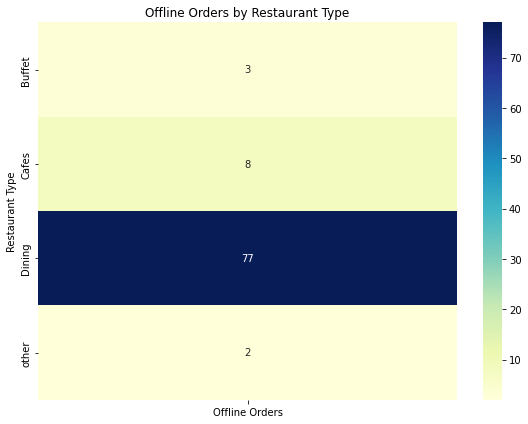

In [65]:
offline_df = df[df['online_order'] == 'No']
offline_counts = offline_df['listed_in(type)'].value_counts().reset_index()
offline_counts.columns = ['Restaurant Type', 'Offline Orders']

# Pivot for heatmap
heatmap_data = offline_counts.pivot_table(values='Offline Orders', index='Restaurant Type')

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='g')
plt.title("Offline Orders by Restaurant Type")
plt.ylabel("Restaurant Type")
plt.tight_layout()
plt.show()


Dining restaurant has maximum offline orders

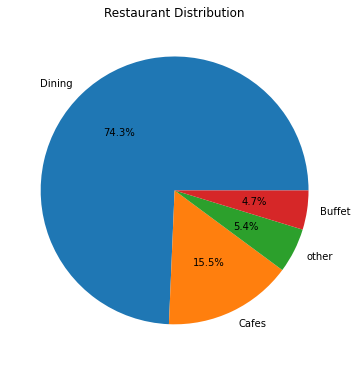

In [66]:
restaurant_type = df['listed_in(type)'].value_counts()
plt.figure(figsize = (6,8))
plt.pie(restaurant_type , labels = restaurant_type.index, autopct = "%1.1f%%")
plt.title("Restaurant Distribution")
plt.show()

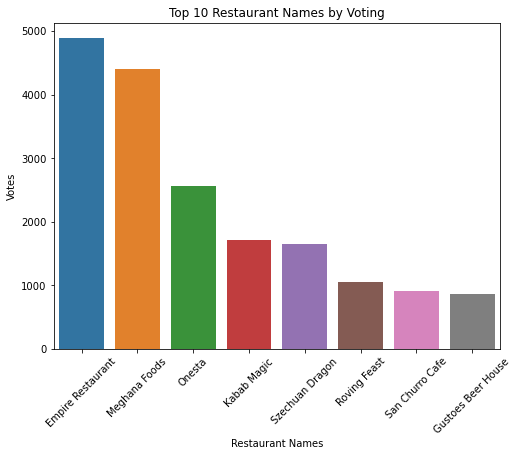

In [88]:
dataframe = df.sort_values(by = "votes" ,ascending=False).head(10)
plt.figure(figsize=(8,6))
sns.barplot(data = dataframe , x="name" , y = "votes")
plt.xlabel("Restaurant Names")
plt.ylabel("Votes")
plt.title("Top 10 Restaurant Names by Voting")
plt.xticks(rotation = 45)
plt.show()